<h1><center>Wine Dataset</center></h1>

## Loading modules

In [1]:
import openturns as ot
import openturns.viewer as otv
import pyAgrum as gum
import otagrum as otagr

from pathlib import Path
import numpy as np

import graphviz
import matplotlib.pyplot as plt
%matplotlib inline 

## Defining util functions

### write_graph

Allows to write a graph in dot format into a file

In [2]:
def write_graph(graph, file_name="output.dot"):
    ''' Util function to write the graph into a DOT file'''
    with open(file_name, 'w') as fo:
        fo.write(graph.toDot())

## dot_quote_adder

Need it because toDot() method doesn't put quotes around variable names (yet!)

In [3]:
def dot_quote_adder(dot_string):
    new_dot_string = ''
    dot_string = dot_string.splitlines()
    header = dot_string[0]
    body = dot_string[1:-1]
    tailer = dot_string[-1]

    arcs = []
    for b in body:
        nodes = b.replace('    ', '').split('->')
        if len(nodes) == 2:
            arcs.append(nodes)

    arcs = ['\"' + a[0] + '\"->\"' + a[1] + '\"' for a in arcs]
    new_dot_string += header + '\n'
    for a in arcs:
        new_dot_string += '    ' + a + '\n'
    new_dot_string += tailer
    
    return new_dot_string

### pairs

Allows to plot all pairs of variable into a scatter plot.
It does it with raw data and rank data.

In [4]:
def pairs(data, filename):
    ''' Allows to plot the data for each pair of component random variable'''
    print("  Draw pairs")
    print("    Distribution")
    g = ot.Graph()
    pairs_data = ot.Pairs(data)
    pairs_data.setPointStyle('dot')
    g.add(pairs_data)
    view = otv.View(g,(800,800),square_axes=True)
    view.show()
#    view.save(filename)
#    print("Saving figure in {}".format(filename))
#    view.close()
    print("    Copula")
    g = ot.Graph()
    pairs_data = ot.Pairs((data.rank() + 0.5) / data.getSize())
    pairs_data.setPointStyle('dot')
    g.add(pairs_data)
    view = otv.View(g,(800,800),square_axes=True)
    view.show()
#    view.save(filename.parent.joinpath(filename.stem+'_copula'+filename.suffix))
#    print("Saving figure in {}".format(filename.parent.joinpath(filename.stem+'_copula'+filename.suffix)))
#    view.close()

## Setting data, results and figure paths 

In [5]:
location = Path('..') 

data_path = location.joinpath("data/")

result_path = location.joinpath("results/")
result_path.mkdir(parents=True, exist_ok=True)

figure_path = location.joinpath("figures/")
figure_path.mkdir(parents=True, exist_ok=True)

## Loading data

In [6]:
# Data file name
file_name = 'winequality-red.csv'

# Loading data
data_ref = ot.Sample.ImportFromTextFile(str(data_path.joinpath(file_name)), ";")
size = data_ref.getSize()     # Size of data
dim = data_ref.getDimension() # Dimension of data

## Reference data

Processing reference data
  Draw pairs
    Distribution
    Copula


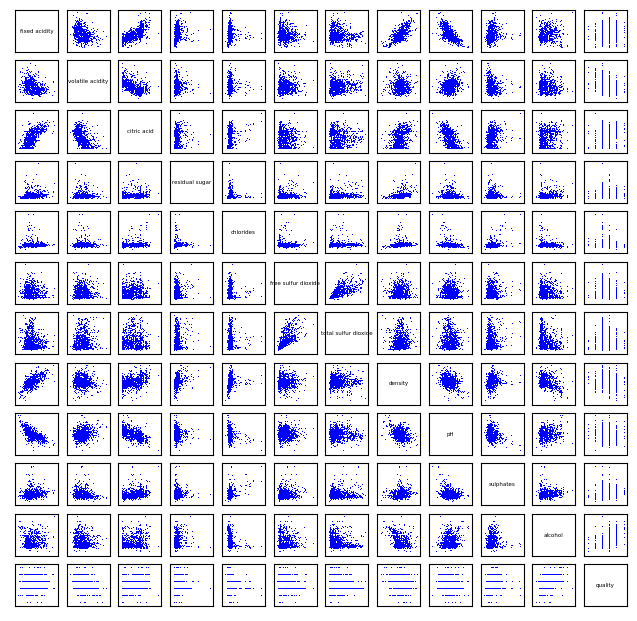

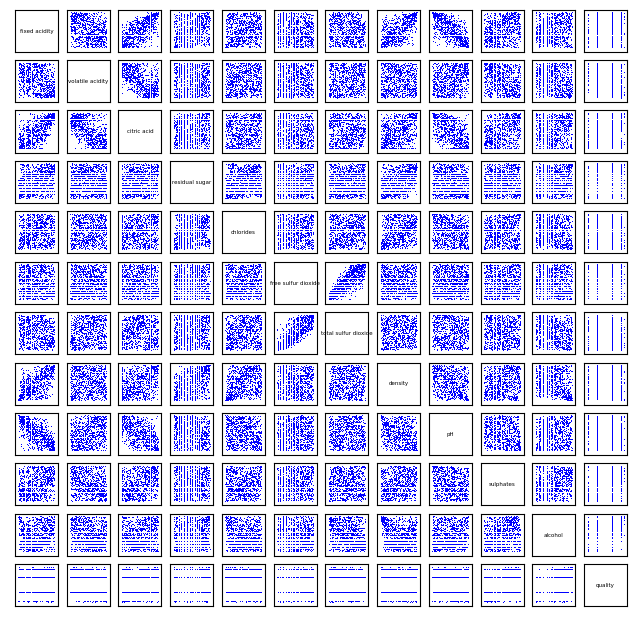

In [7]:
# Number of data to draw from model
size_draw = 1000

size_draw = min(size, size_draw)
data_draw = data_ref[0:size_draw]  # Number of realizations taken in order to plot figures

print("Processing reference data")
f = figure_path.joinpath("pairs_ref.pdf")
pairs(data_draw, f)

## Learning CBN model

### Learning structure

#### CBIC Algorithm

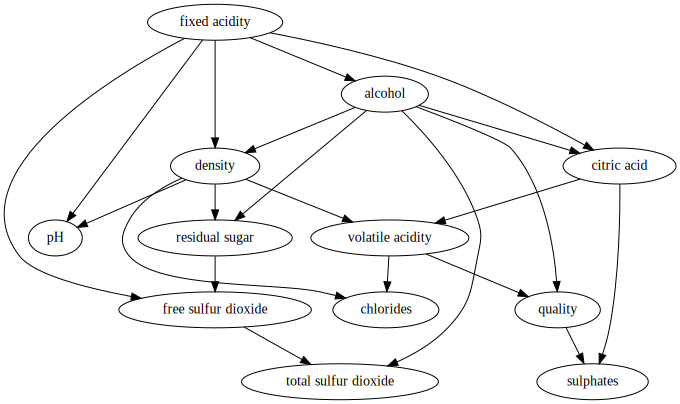

In [8]:
learner = otagr.TabuList(data_ref, 2, 10, 2) # Using CPC algorithm
cbic_dag = learner.learnDAG() # Learning DAG

graphviz.Source(dot_quote_adder(cbic_dag.toDot()))

#### CPC Algorithm

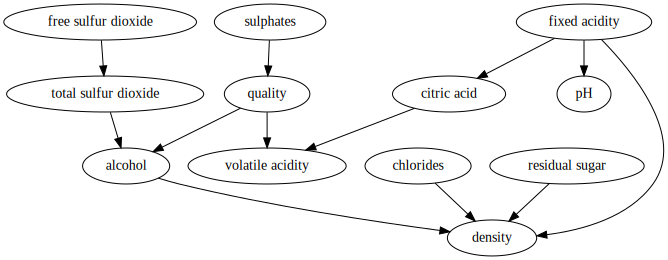

In [9]:
learner = otagr.ContinuousPC(data_ref, 4, 0.05) # Using CPC algorithm
cpc_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cpc_dag.toDot()))

#### CMIIC Algorithm

##### Alpha = 0.01

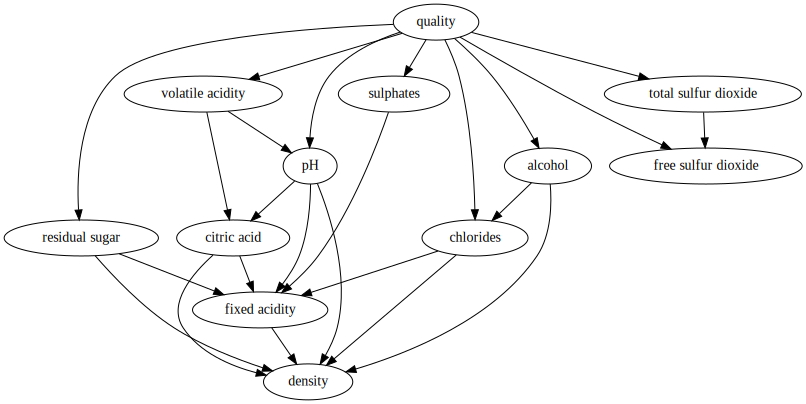

In [10]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.01)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

##### Alpha = 0.02

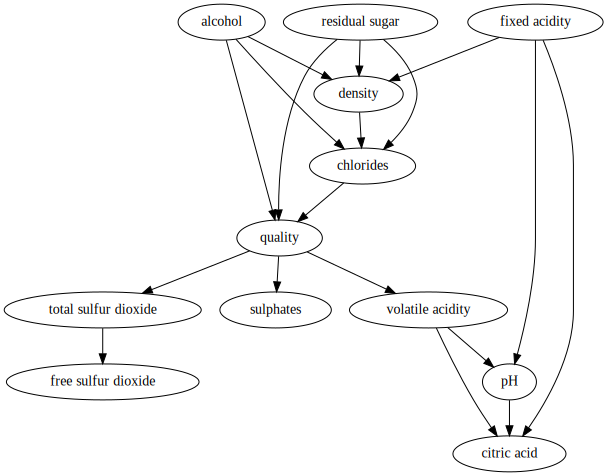

In [11]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.02)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

##### Alpha = 0.03

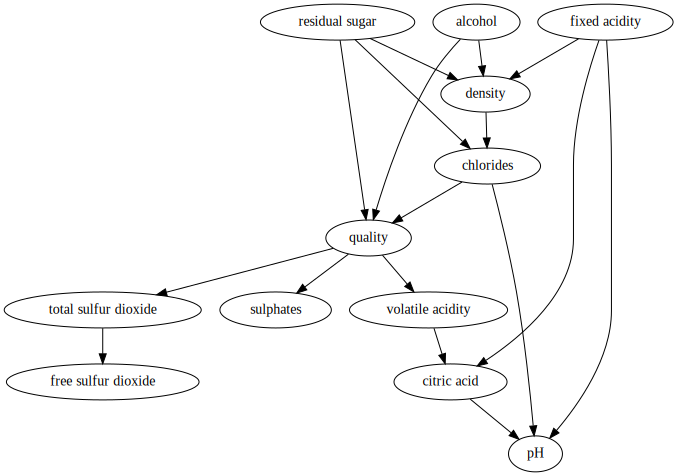

In [12]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.03)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

##### Alpha = 0.04

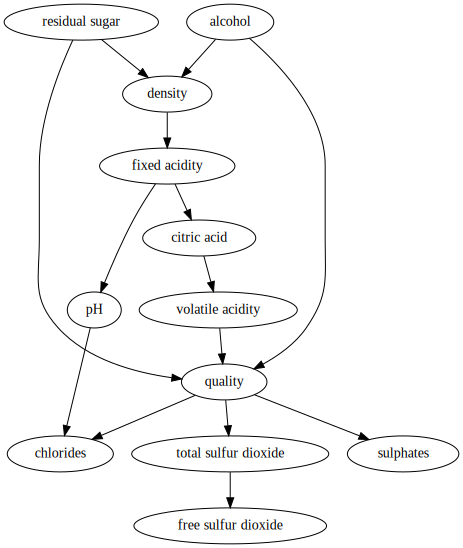

In [13]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.04)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

##### Alpha = 0.05

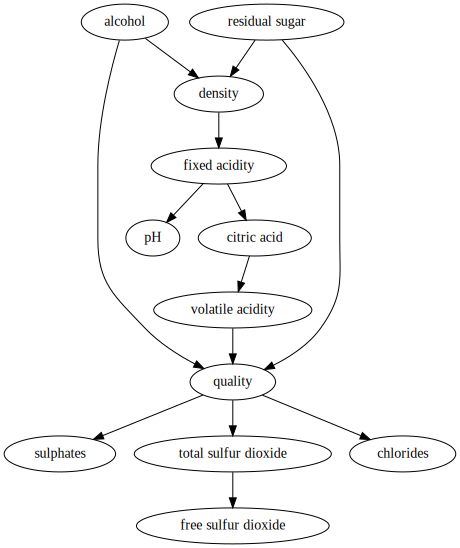

In [14]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.05)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

##### Alpha = 0.06

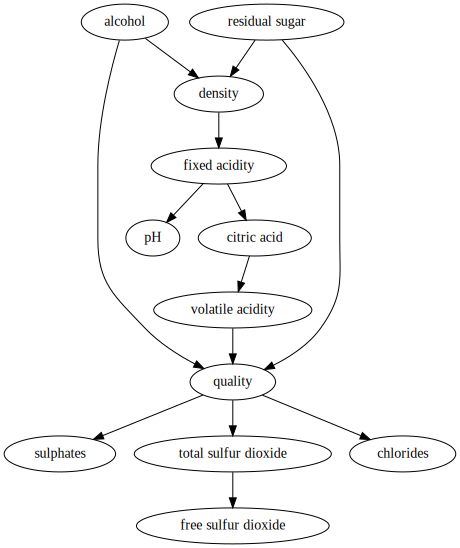

In [15]:
learner = otagr.ContinuousMIIC(data_ref) # Using CPC algorithm
learner.setAlpha(0.06)
cmiic_dag = learner.learnDAG() # Learning DAG
#write_graph(dag, result_path.joinpath("dag.dot"))

graphviz.Source(dot_quote_adder(cmiic_dag.toDot()))

### Learning parameters

#### CBIC

  Draw pairs
    Distribution
    Copula


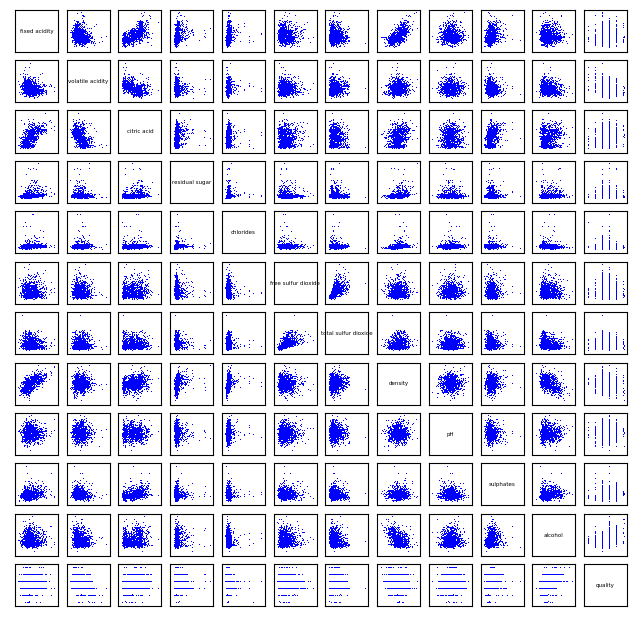

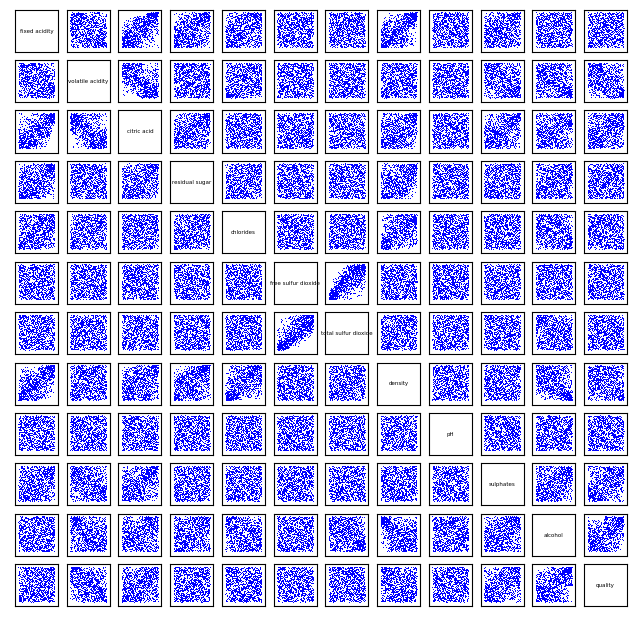

In [16]:
cbic_cbn = otagr.ContinuousBayesianNetworkFactory(ot.KernelSmoothing(ot.Epanechnikov()),
                                             ot.BernsteinCopulaFactory(),
                                             cbic_dag,
                                             0.05,
                                             4,
                                             False).build(data_ref)

f = figure_path.joinpath("pairs_KSBIC.pdf")
pairs(cbic_cbn.getSample(size_draw), f)

  Draw pairs
    Distribution
    Copula


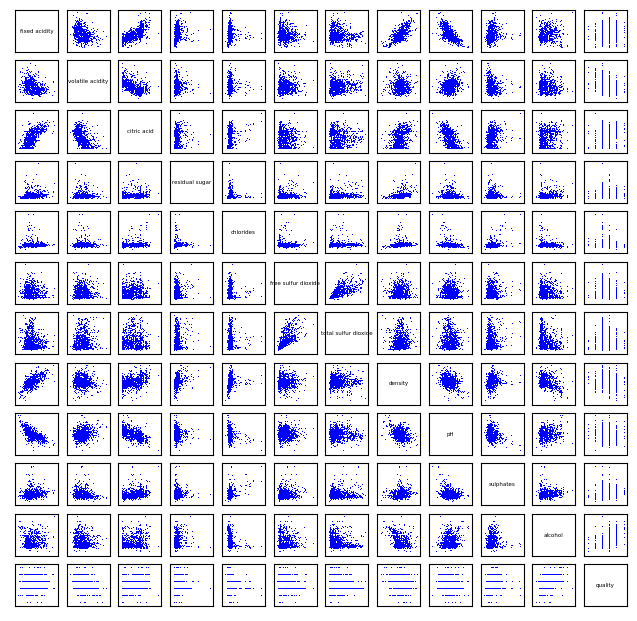

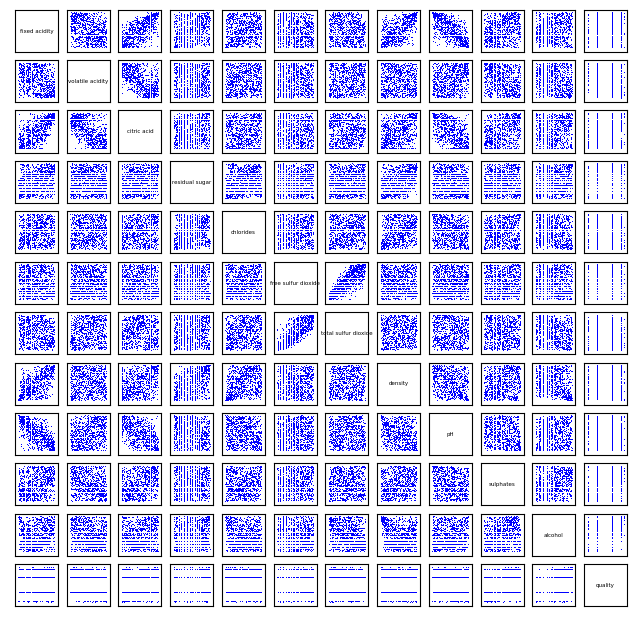

In [21]:
#REF DATA
pairs(data_draw, f)

#### CPC

  Draw pairs
    Distribution
    Copula


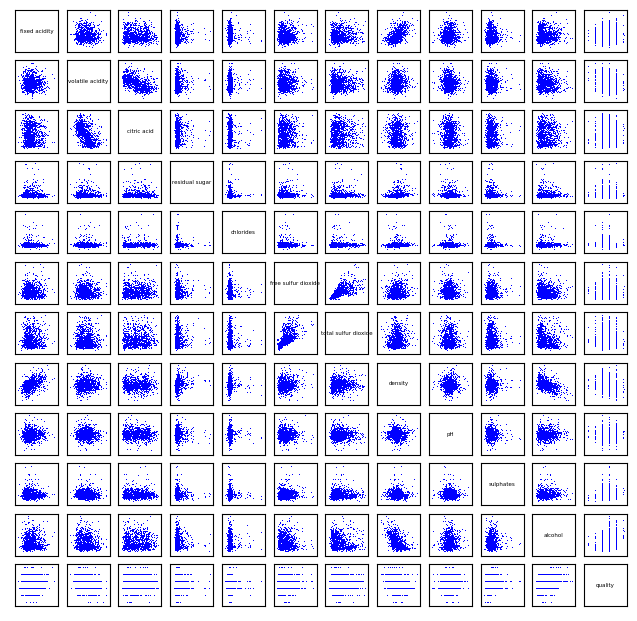

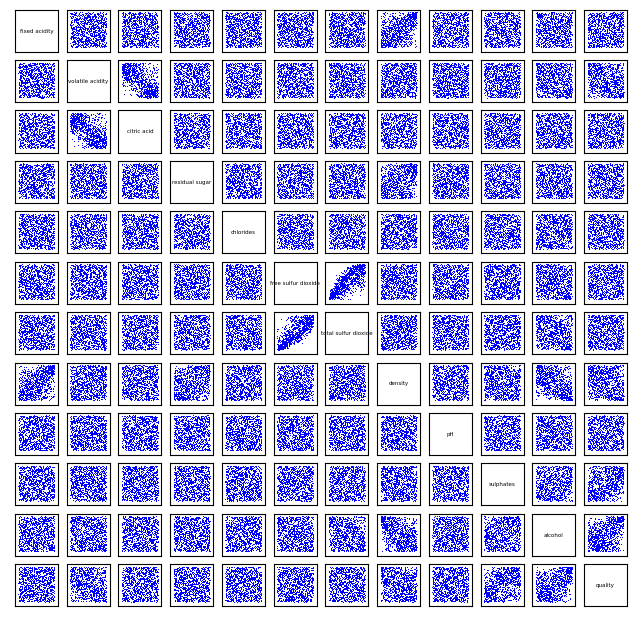

In [17]:
cpc_cbn = otagr.ContinuousBayesianNetworkFactory(ot.KernelSmoothing(ot.Epanechnikov()),
                                             ot.BernsteinCopulaFactory(),
                                             cpc_dag,
                                             0.05,
                                             4,
                                             False).build(data_ref)

f = figure_path.joinpath("pairs_KSPC.pdf")
pairs(cpc_cbn.getSample(size_draw), f)

  Draw pairs
    Distribution
    Copula


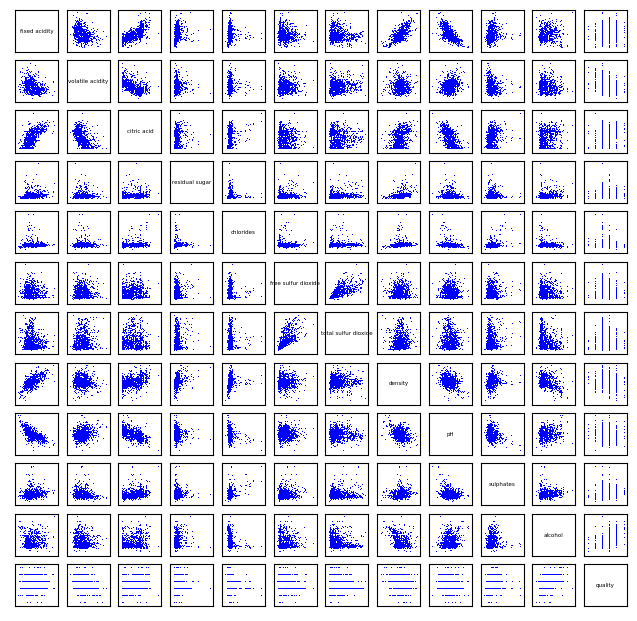

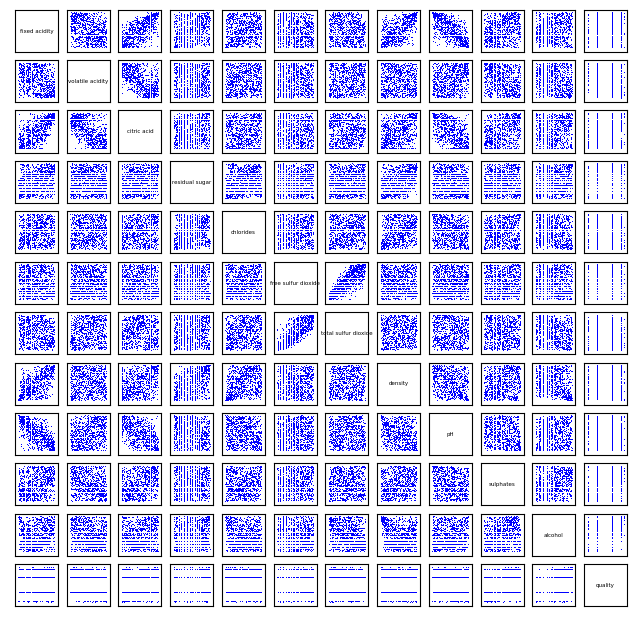

In [20]:
#REF DATA
pairs(data_draw, f)

#### CMIIC

  Draw pairs
    Distribution
    Copula


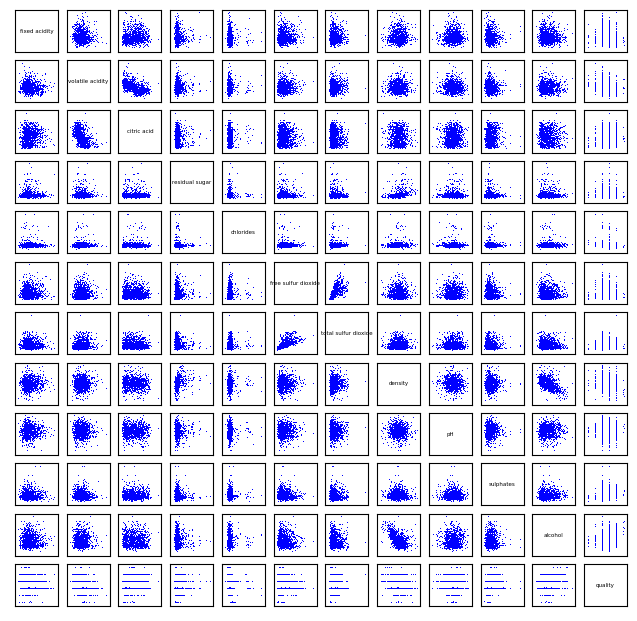

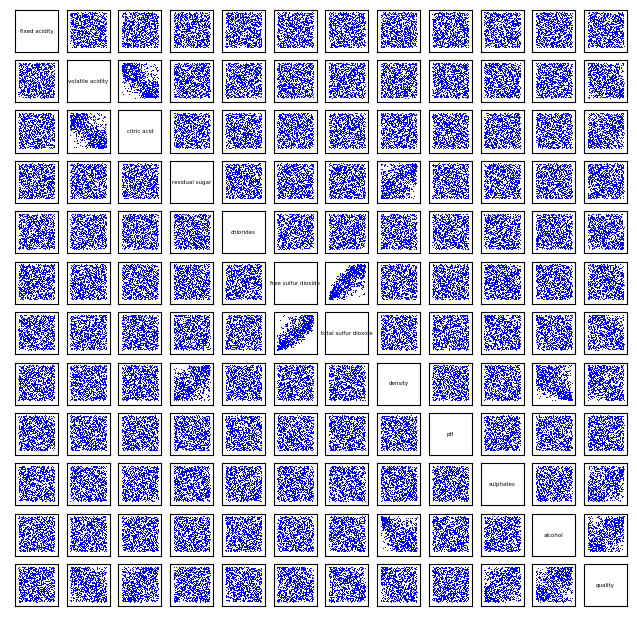

In [18]:
cmiic_cbn = otagr.ContinuousBayesianNetworkFactory(ot.KernelSmoothing(ot.Epanechnikov()),
                                             ot.BernsteinCopulaFactory(),
                                             cmiic_dag,
                                             0.05,
                                             4,
                                             False).build(data_ref)

f = figure_path.joinpath("pairs_KSMIIC.pdf")
pairs(cmiic_cbn.getSample(size_draw), f)

  Draw pairs
    Distribution
    Copula


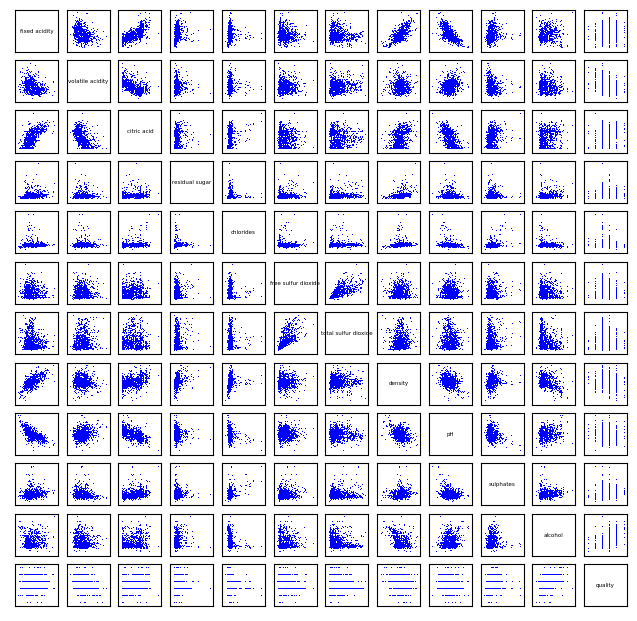

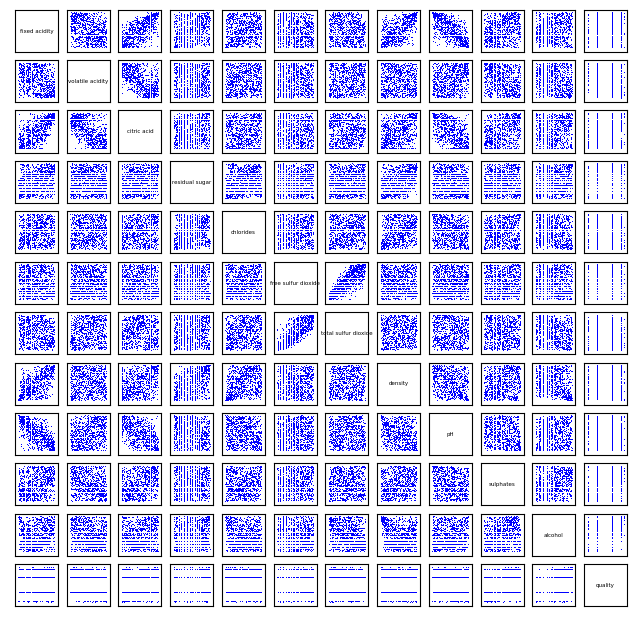

In [19]:
#REF DATA
pairs(data_draw, f)